In [1]:
import capytaine as cpt
import numpy as np
import matplotlib.pyplot as plt
from capytaine.bem.airy_waves import airy_waves_potential, airy_waves_velocity, froude_krylov_force
import time

In [2]:
solver = cpt.BEMSolver()

def showBemCompoundCylinder(a1,a2,d1,d2,resolution):
  body2 = cpt.meshes.predefined.mesh_vertical_cylinder(radius= a2,center=(0,0,0),length = d2,faces_max_radius=resolution*a2)
  body1 = cpt.meshes.predefined.mesh_vertical_cylinder(radius=a1,center=(0,0,0),length = d1-d2,faces_max_radius=resolution*a2)
  body1 = body1.translated([0,0,-d2-0.001])
  

  body = body1 + body2
  body = cpt.FloatingBody(body)
  body.add_translation_dof(name='Heave')
  body = body.immersed_part()
  body.show_matplotlib()


def bemCompoundCylinder(h,a1,a2,d1,d2,resolution, w):
  body2 = cpt.meshes.predefined.mesh_vertical_cylinder(radius= a2,center=(0,0,0),length = d2,faces_max_radius=resolution*a2)
  body1 = cpt.meshes.predefined.mesh_vertical_cylinder(radius=a1,center=(0,0,0),length = d1-d2,faces_max_radius=resolution*a2)
  body1 = body1.translated([0,0,-d2-0.00001])

  body = body1 + body2
  body = cpt.FloatingBody(body)
  body.add_translation_dof(name='Heave')
  body = body.immersed_part()
  #body.show_matplotlib()
  faces_centers = body.mesh.faces_centers

  rad_problem = cpt.RadiationProblem(body=body,
                                        wavenumber = w, water_depth=h)
  results = solver.solve(rad_problem, keep_details = True, )
  dataset = cpt.assemble_dataset([results])
  
  w = 1
  rho = 1023 # density of our special material
  wave_amp = 1
  g = 9.81
  omega = np.sqrt(w*np.tanh(w*h)*g)

  A = np.array(dataset['added_mass'])
  B = np.array(dataset['radiation_damping'])
  A_nondim = h**3 / (rho * np.pi * a2**3) * A
  B_nondim = h**3 / (omega * rho * np.pi * a2**3) * B
  return A,B, A_nondim, B_nondim, body.mesh.nb_faces

# def timeit(res,iter):
#   def oneRun(res):
#     start_time = time.time()
#     result = bemCompoundCylinder(h,a1,a2,d1,d2,res)
#     end_time = time.time()
#     return end_time-start_time
#   avg_time = np.mean([oneRun(res) for i in range(iter)])
#   return avg_time

# avg_time = timeit(resolution,100)#default resolution

# print(f"Execution time: {avg_time} seconds") #run more than once ..second time is the actual runtime that excludes compile time


[22:30:23] WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_15"),   
                    wavenumber=0.384, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_15") might 
                    be insufficient for wavenumber=0.38421052631578945.                                            
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_15"), wavenumber=0.384, water_depth=25.0, radiating_dof='Heave'):   
                    The body FloatingBody(..., name="collection_of_meshes_15") might display irregular frequencies 
                    for wavenumber=0.38421052631578945.                                                            
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_28"),   
                    wavenumber=0.668, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_28") might 
                    be insufficient for wavenumber=0.6684210526315789.                                             
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_28"), wavenumber=0.668, water_depth=25.0, radiating_dof='Heave'):   
                    The body FloatingBody(..., name="collection_of_meshes_28") might display irregular frequencies 
                    for wavenumber=0.6684210526315789.                                                             
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_41"),   
                    wavenumber=0.953, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_41") might 
                    be insufficient for wavenumber=0.9526315789473684.                                             
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_41"), wavenumber=0.953, water_depth=25.0, radiating_dof='Heave'):   
                    The body FloatingBody(..., name="collection_of_meshes_41") might display irregular frequencies 
                    for wavenumber=0.9526315789473684.                                                             
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_54"),   
                    wavenumber=1.237, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_54") might 
                    be insufficient for wavenumber=1.236842105263158.                                              
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_54"), wavenumber=1.237, water_depth=25.0, radiating_dof='Heave'):   
                    The body FloatingBody(..., name="collection_of_meshes_54") might display irregular frequencies 
                    for wavenumber=1.236842105263158.                                                              
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_67"),   
                    wavenumber=1.521, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_67") might 
                    be insufficient for wavenumber=1.5210526315789474.                                             
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_67"), wavenumber=1.521, water_depth=25.0, radiating_dof='Heave'):   
                    The body FloatingBody(..., name="collection_of_meshes_67") might display irregular frequencies 
                    for wavenumber=1.5210526315789474.                                                             
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_80"),   
                    wavenumber=1.805, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_80") might 
                    be insufficient for wavenumber=1.805263157894737.                                              
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_80"), wavenumber=1.805, water_depth=25.0, radiating_dof='Heave'):   
                    The body FloatingBody(..., name="collection_of_meshes_80") might display irregular frequencies 
                    for wavenumber=1.805263157894737.                                                              
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_93"),   
                    wavenumber=2.089, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_93") might 
                    be insufficient for wavenumber=2.0894736842105264.                                             
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_93"), wavenumber=2.089, water_depth=25.0, radiating_dof='Heave'):   
                    The body FloatingBody(..., name="collection_of_meshes_93") might display irregular frequencies 
                    for wavenumber=2.0894736842105264.                                                             
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_106"),  
                    wavenumber=2.374, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_106") might
                    be insufficient for wavenumber=2.373684210526316.                                              
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_106"), wavenumber=2.374, water_depth=25.0, radiating_dof='Heave'):  
                    The body FloatingBody(..., name="collection_of_meshes_106") might display irregular frequencies
                    for wavenumber=2.373684210526316.                                                              
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_119"),  
                    wavenumber=2.658, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_119") might
                    be insufficient for wavenumber=2.6578947368421053.                                             
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_119"), wavenumber=2.658, water_depth=25.0, radiating_dof='Heave'):  
                    The body FloatingBody(..., name="collection_of_meshes_119") might display irregular frequencies
                    for wavenumber=2.6578947368421053.                                                             
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_132"),  
                    wavenumber=2.942, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_132") might
                    be insufficient for wavenumber=2.942105263157895.                                              
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_132"), wavenumber=2.942, water_depth=25.0, radiating_dof='Heave'):  
                    The body FloatingBody(..., name="collection_of_meshes_132") might display irregular frequencies
                    for wavenumber=2.942105263157895.                                                              
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_145"),  
                    wavenumber=3.226, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_145") might
                    be insufficient for wavenumber=3.2263157894736842.                                             
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_145"), wavenumber=3.226, water_depth=25.0, radiating_dof='Heave'):  
                    The body FloatingBody(..., name="collection_of_meshes_145") might display irregular frequencies
                    for wavenumber=3.2263157894736842.                                                             
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_158"),  
                    wavenumber=3.511, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_158") might
                    be insufficient for wavenumber=3.5105263157894737.                                             
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_158"), wavenumber=3.511, water_depth=25.0, radiating_dof='Heave'):  
                    The body FloatingBody(..., name="collection_of_meshes_158") might display irregular frequencies
                    for wavenumber=3.5105263157894737.                                                             
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_171"),  
                    wavenumber=3.795, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_171") might
                    be insufficient for wavenumber=3.794736842105263.                                              
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_171"), wavenumber=3.795, water_depth=25.0, radiating_dof='Heave'):  
                    The body FloatingBody(..., name="collection_of_meshes_171") might display irregular frequencies
                    for wavenumber=3.794736842105263.                                                              
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_184"),  
                    wavenumber=4.079, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_184") might
                    be insufficient for wavenumber=4.078947368421052.                                              
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_184"), wavenumber=4.079, water_depth=25.0, radiating_dof='Heave'):  
                    The body FloatingBody(..., name="collection_of_meshes_184") might display irregular frequencies
                    for wavenumber=4.078947368421052.                                                              
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_197"),  
                    wavenumber=4.363, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_197") might
                    be insufficient for wavenumber=4.363157894736842.                                              
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_197"), wavenumber=4.363, water_depth=25.0, radiating_dof='Heave'):  
                    The body FloatingBody(..., name="collection_of_meshes_197") might display irregular frequencies
                    for wavenumber=4.363157894736842.                                                              
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_210"),  
                    wavenumber=4.647, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_210") might
                    be insufficient for wavenumber=4.647368421052631.                                              
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_210"), wavenumber=4.647, water_depth=25.0, radiating_dof='Heave'):  
                    The body FloatingBody(..., name="collection_of_meshes_210") might display irregular frequencies
                    for wavenumber=4.647368421052631.                                                              
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_223"),  
                    wavenumber=4.932, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_223") might
                    be insufficient for wavenumber=4.93157894736842.                                               
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_223"), wavenumber=4.932, water_depth=25.0, radiating_dof='Heave'):  
                    The body FloatingBody(..., name="collection_of_meshes_223") might display irregular frequencies
                    for wavenumber=4.93157894736842.                                                               
                    Setting a lid for the floating body is recommended.

           WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_236"),  
                    wavenumber=5.216, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_236") might
                    be insufficient for wavenumber=5.21578947368421.                                               
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_236"), wavenumber=5.216, water_depth=25.0, radiating_dof='Heave'):  
                    The body FloatingBody(..., name="collection_of_meshes_236") might display irregular frequencies
                    for wavenumber=5.21578947368421.                                                               
                    Setting a lid for the floating body is recommended.

[22:30:24] WARNING  Mesh resolution for RadiationProblem(body=FloatingBody(..., name="collection_of_meshes_249"),  
                    wavenumber=5.500, water_depth=25.0, radiating_dof='Heave'):                                    
                    The resolution of the mesh of the body FloatingBody(..., name="collection_of_meshes_249") might
                    be insufficient for wavenumber=5.5.                                                            
                    This warning appears because the largest panel of this mesh has radius 6.514 > wavelength/8.

           WARNING  Irregular frequencies for RadiationProblem(body=FloatingBody(...,                              
                    name="collection_of_meshes_249"), wavenumber=5.500, water_depth=25.0, radiating_dof='Heave'):  
                    The body FloatingBody(..., name="collection_of_meshes_249") might display irregular frequencies
                    for wavenumber=5.5.                                                                            
                    Setting a lid for the floating body is recommended.

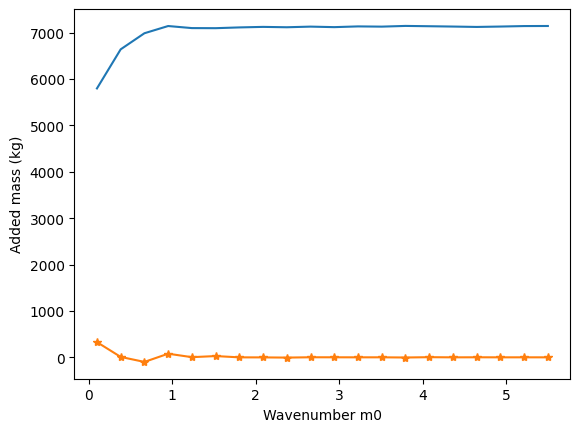

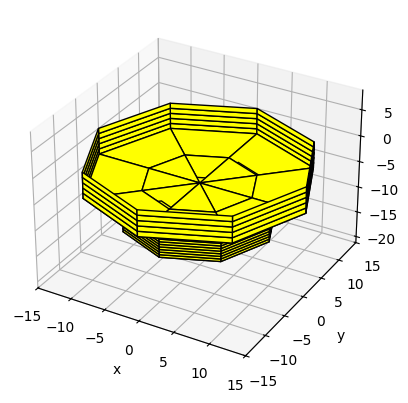

In [3]:
# Mini Bicylinder
# h = 1.05
# a1 = 0.5
# a2 = 1
# d1 = 0.5
# d2 = 0.25
# resolution = 30

# # Small Bicylinder
# h = 20.0
# a1 = 5.0
# a2 = 10.0
# d1 = 10.0
# d2 = 5.0
# resolution = 30

# Big Bicylinder
h = 25.0
a1 = 10.0
a2 = 15.0
d1 = 15.0
d2 = 10.0
resolution = 30

m0_nums = np.linspace(0.1, 5.5, 20)
results = [bemCompoundCylinder(h,a1,a2,d1,d2,resolution, w) for w in m0_nums]

A_nondim = [res[2].flatten() for res in results]
B_nondim = [res[3].flatten() for res in results]

plt.figure()
plt.plot(m0_nums,A_nondim, m0_nums,B_nondim, '*-')
plt.xlabel("Wavenumber m0")
plt.ylabel("Added mass (kg)")
plt.show()

showBemCompoundCylinder(a1,a2,d1,d2,resolution)

In [4]:
print(A_nondim)
print(B_nondim)

[array([5797.78003917]), array([6640.99277219]), array([6987.7621069]), array([7143.44645136]), array([7099.0144655]), array([7097.02703527]), array([7113.56466733]), array([7124.90291904]), array([7116.95643627]), array([7130.71480046]), array([7119.49686767]), array([7135.34827929]), array([7130.44923683]), array([7145.74722067]), array([7139.04438581]), array([7132.09590079]), array([7123.80026909]), array([7132.25087853]), array([7142.63712847]), array([7144.25991121])]
[array([327.42383565]), array([8.59079877]), array([-99.2996052]), array([77.57083745]), array([3.22442825]), array([26.88663571]), array([-0.895786]), array([-1.70278338]), array([-5.96530524]), array([1.06431608]), array([0.40219477]), array([-0.26961897]), array([0.06933639]), array([-3.95572906]), array([2.78373494]), array([-0.64263373]), array([0.64674091]), array([-0.368417]), array([-0.13571935]), array([-0.41165932])]


In [ ]:
times = [timeit(res,10) for res in resolutions]


plt.figure()
plt.plot(npanels,times,'*-')
plt.xlabel("Panels (N)")
plt.ylabel("Time(s)")
plt.show()
